In [1]:
# For creating graph 
import networkx as nx

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Tracking the time model takes
from time import time

In [2]:
df=pd.read_csv('train.csv')
df.head(10)

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927
5,2,1194519
6,2,470294
7,2,961886
8,2,626040
9,3,176995


In [11]:
df1=pd.read_csv('test.csv')
df1.head(10)

,source_node
0,20
1,24
2,31
3,35
4,42
5,49
6,52
7,62
8,71
9,74


In [9]:
df1.head()

,source_node
0,20
1,24
2,31
3,35
4,42


In [3]:
df.shape

(9437519, 2)

In [5]:
df.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [8]:
sum(df.isna().any(1))

0

In [11]:
sum(df.duplicated())

0

# Saving csv without header 

In [3]:
df.to_csv('data/train_woheader.csv',header=False,index=False)

In [4]:
g=nx.read_edgelist('data/train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

** Observation **
 * This graph is directed graph.
 * nx() is by defalut undirected graph.

### Basic Information of graph.

In [5]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


* in degree = incoming node.
* out degree = outgoing node.

# Reading 50 rows.

In [6]:
pd.read_csv('train.csv',nrows=50).to_csv('data/train_woheader_sample.csv',header=False,index=False)

In [7]:
subgraph=nx.read_edgelist('data/train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

# Visualization

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


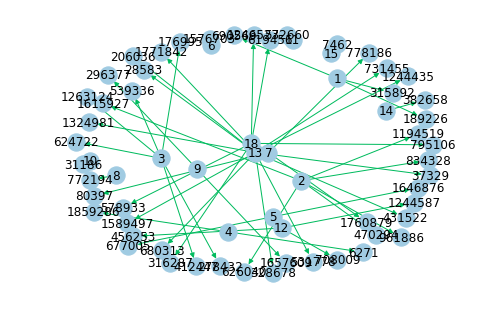

In [8]:
pos=nx.spring_layout(subgraph) # spring = circle layout
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

* inner nodes are source nodes and outer nodes are destination nodes.

In [9]:
#No. of unique nodes
len(g.nodes)

1862220

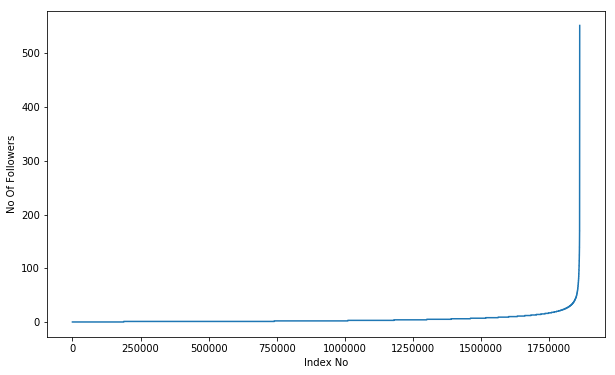

In [10]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

** Observation **
* There are very less people having more followers. i.e. we have the data of common peoples

In [11]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [23]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


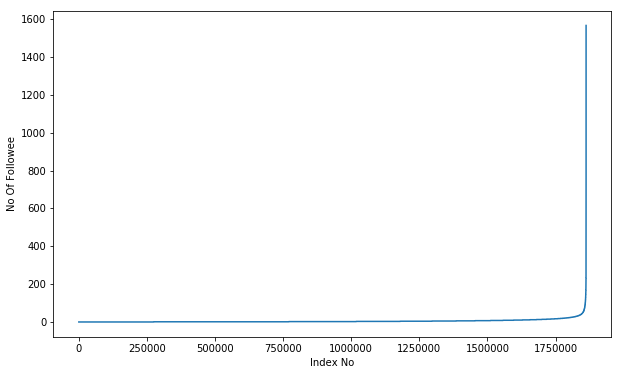

In [12]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followee')
plt.show()

** Observation **
* There are very less people having more followee.

In [26]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [27]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


In [28]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is',
        sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist))

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [29]:
print('No of persons who have no followers' ,sum(np.array(indegree_dist)==0),'and % is',
        sum(np.array(indegree_dist)==0)*100/len(indegree_dist))

No of persons who have no followers 188043 and % is 10.097786512871734


** Observation **
* The above data indicates that these many people are not using or not active on social n/w 

In [13]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

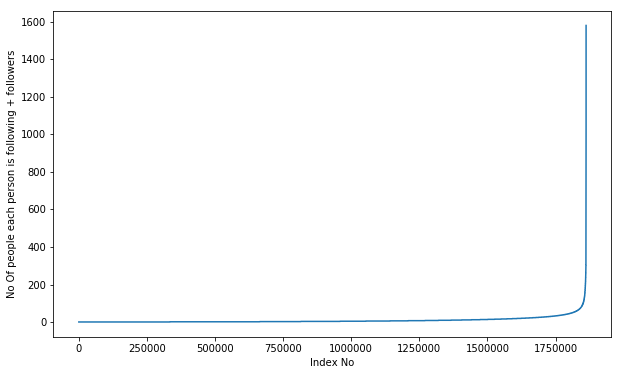

In [14]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [33]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [34]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [35]:
df.shape

(9437519, 2)

In [15]:
import csv

In [ ]:
%%time
###generating missing edges from given graph
import random
#getting all set of edges
r = csv.reader(open('data/train_woheader.csv','r'))
#the dict will contain a tuple of 2 nodes as key and the value will be 1 is the nodes are connected else -1
edges = dict()
# for present edges.
for edge in r: # i.e. edge is present in train data.
	edges[(edge[0], edge[1])] = 1 # if edge is present in r then 1.

# for missing edges.
missing_edges = set([])
while (len(missing_edges)<9437519):
	a=random.randint(1, 1862220) # no. of nodes
	b=random.randint(1, 1862220) # no. of nodes
	tmp = edges.get((a,b),-1) # marked -1 for all edges which are missing.
	if tmp == -1 and a!=b: # if edge is missing and a and b are not same.
		try:
            # adding points who less likely to be friends
			if nx.shortest_path_length(g,source=a,target=b) > 2: # greater than 2 coz more dist. low prob. to become a frd. That is what we want as a data/edge to add or join.

				missing_edges.add((a,b))
			else:
				continue  
		except:  
				missing_edges.add((a,b))              
	else:
		continue

In [3]:
import pickle

Saving the pickle file of missing_edges.

In [41]:
pickle.dump(missing_edges,open('data/missing_edges_final.p','wb'))

In [42]:
len(missing_edges)

9437519

* positive = connected nodes
* negative = missing nodes

In [4]:
file = open("data/missing_edges_final.p","rb")

In [5]:
missing_edges = pickle.load(file)

In [6]:
#reading total data df
df_pos = pd.read_csv('train.csv')
df_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])

print("Number of nodes in the graph with edges", df_pos.shape[0])
print("Number of nodes in the graph without edges", df_neg.shape[0])

#Trian test split 
#Spiltted data into 80-20 
#positive links and negative links seperatly because we need positive training data only for creating graph 
#and for feature generation
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)

print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

#removing header and saving
X_train_pos.to_csv('data/train_pos_after_eda.csv',header=False, index=False)
X_test_pos.to_csv('data/test_pos_after_eda.csv',header=False, index=False)
X_train_neg.to_csv('data/train_neg_after_eda.csv',header=False, index=False)
X_test_neg.to_csv('data/test_neg_after_eda.csv',header=False, index=False)

Number of nodes in the graph with edges 9437519
Number of nodes in the graph without edges 9437519
Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


In [16]:
X_train_pos.head()

,source_node,destination_node
1391430,273084,1505602
4629886,912810,1678443
1861427,365429,1523458
2677448,527014,1605979
6220735,1228116,471233


In [15]:
X_test_pos.head()

,source_node,destination_node
4303730,848424,784690
6328118,1248963,444518
1347397,264224,132395
2788658,549680,326829
4439018,875380,1394902


In [12]:
y_train_pos

array([1., 1., 1., ..., 1., 1., 1.])

In [11]:
y_test_pos

array([1., 1., 1., ..., 1., 1., 1.])

In [7]:
del missing_edges

In [47]:
import os

In [48]:
if (os.path.isfile('data/train_pos_after_eda.csv')) and (os.path.isfile('data/test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('data/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('data/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

In [49]:
#final train and test data sets
if (not os.path.isfile('data/train_after_eda.csv')) and \
(not os.path.isfile('data/test_after_eda.csv')) and \
(not os.path.isfile('data/train_y.csv')) and \
(not os.path.isfile('data/test_y.csv')) and \
(os.path.isfile('data/train_pos_after_eda.csv')) and \
(os.path.isfile('data/test_pos_after_eda.csv')) and \
(os.path.isfile('data/train_neg_after_eda.csv')) and \
(os.path.isfile('data/test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv('data/train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv('data/test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv('data/train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv('data/test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('data/train_after_eda.csv',header=False,index=False)
    X_test.to_csv('data/test_after_eda.csv',header=False,index=False)
    pd.DataFrame(y_train.astype(int)).to_csv('data/train_y.csv',header=False,index=False)
    pd.DataFrame(y_test.astype(int)).to_csv('data/test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


In [50]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)
